In [6]:
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [36]:
class TimeSeriesMemoryBank:
    def __init__(self, window_size, horizon, stride=1):
        """
        Args:
            window_size (int): The look-back period (Input X).
            horizon (int): The forecast period (Target Y).
            stride (int): Step size for the sliding window.
        """
        self.window_size = window_size
        self.horizon = horizon
        self.stride = stride
        self.scaler = StandardScaler()
    def show_params(self):
        print(f"Window Size: {self.window_size}, Horizon: {self.horizon}, Stride: {self.stride}")
    def create_sequences(self, data):
        """
        Converts a 1D time series into X (Query) and Y (Target) sequences.
        """
        # Normalize data first (Crucial for Euclidean distance retrieval later)
        data_norm = self.scaler.fit_transform(data.reshape(-1, 1)).flatten()
        
        X, Y = [], []
        
        # Iterate through the series using sliding window
        for i in range(0, len(data_norm) - self.window_size - self.horizon + 1, self.stride):
            # The 'Query' pattern (e.g., last 30 days)
            window_x = data_norm[i : i + self.window_size]
            
            # The 'Value' pattern (e.g., next 7 days - what actually happened)
            window_y = data_norm[i + self.window_size : i + self.window_size + self.horizon]
            
            X.append(window_x)
            Y.append(window_y)
            
        return np.array(X), np.array(Y)



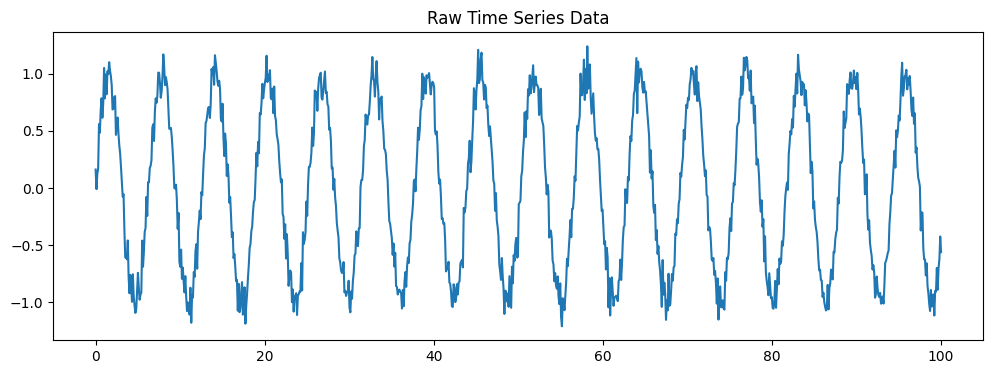

In [16]:
# Usage Example
# simulating a synthetic sine wave with noise (a standard signal processing test)
t = np.linspace(0, 100, 1000)
raw_data = np.sin(t) + np.random.normal(0, 0.1, 1000)


plt.figure(figsize=(12, 4))
plt.plot(t, raw_data)
plt.title("Raw Time Series Data")

plt.show()

In [37]:
# Build the Memory Bank
# Window: Look at past 50 steps. Horizon: Predict next 10.
memory_bank = TimeSeriesMemoryBank(window_size=50, horizon=10)
X_vectors, Y_vectors = memory_bank.create_sequences(raw_data)

memory_bank.show_params()


Window Size: 50, Horizon: 10, Stride: 1


In [ ]:
from chronos import BaseChronosPipeline, Chronos2Pipeline

c:\Users\yahya\Desktop\MR Project\Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
